# Пайплайн

### 1. Загрузка и предварительная обработка данных

##### 1.1 Импорт необходимых библиотек.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, silhouette_score, r2_score)

from tensorflow import keras
from tensorflow.keras import layers, callbacks

##### 1.2 Загрузка и первичный анализ данных.

In [84]:
df = pd.read_excel('data.xlsx', index_col='ID') # Загрузка данных


In [85]:
df.sample(20) # Просмотр случайных 20 строк

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
ID,,,,,,,,,,,,,
311,1.595285,1895.084314,539.966472,151.843877,21.630084,311.756871,760.993126,69.384017,2770.622771,97.401814,0,7.775213,61.420717
639,1.372276,1966.472265,777.775561,117.786370,21.344363,291.856612,1072.489598,70.438921,2566.464137,198.095265,90,8.948995,61.543949
95,3.833405,1921.917639,1343.600867,126.919152,21.245371,303.842914,49.975761,70.678692,3077.869396,208.929446,0,11.891771,49.361683
890,0.927841,1952.857390,304.058314,105.938449,24.791859,318.140519,386.789237,72.221529,2640.186903,84.490129,90,8.299720,59.563595
121,1.660186,1959.596758,149.662405,118.184666,19.331107,253.305034,987.201560,78.868135,2355.725368,171.810458,0,1.734744,67.487314
775,4.232094,1870.970330,498.194241,133.702940,20.865008,319.371724,675.284293,75.004786,3116.574226,255.178647,90,9.917468,53.197072
486,3.290879,2037.898856,702.612297,87.067519,20.746711,335.026336,372.217131,72.039053,2232.096572,206.981036,0,6.505182,59.304158
159,2.776979,2021.527577,871.946044,107.029915,20.388096,295.535488,318.878272,72.205182,2498.544649,216.639017,0,6.781771,43.337652
839,1.497688,1990.008478,888.516937,80.922375,17.924329,233.130738,440.007001,70.860736,1841.004409,244.715217,90,5.731748,58.872101


In [86]:
pd.set_option('display.max_rows', None) # Настройка отображения всех строк и проверка пропущенных значений
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [87]:
df.info() # Проверка типов данных

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [88]:
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(float) # Преобразование типа столбца 'Угол нашивки, град' в float
df.info() # Повторная проверка типов данных

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки           

### 2. Разведочный анализ данных

##### 2.1 Анализ распределений.

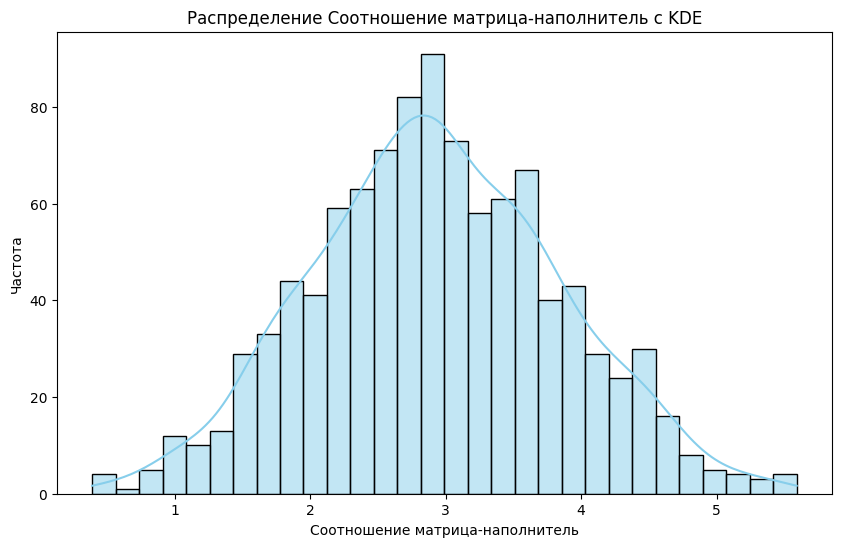

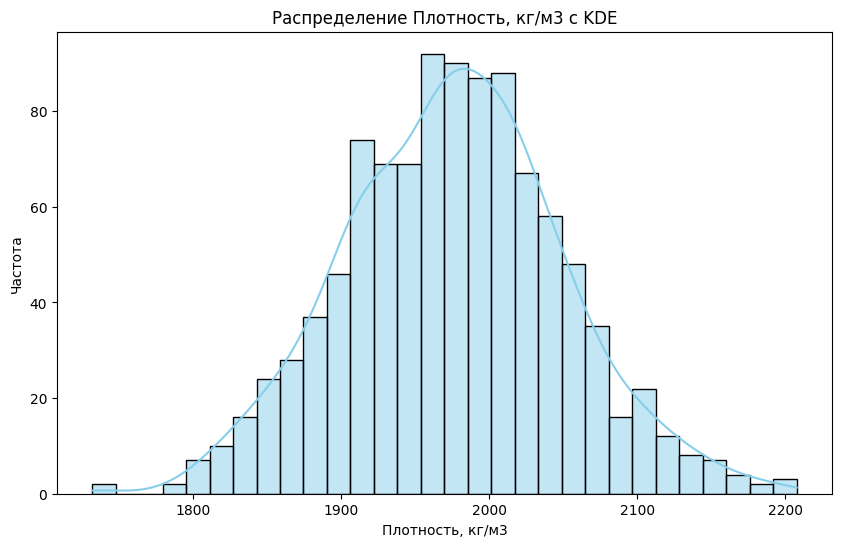

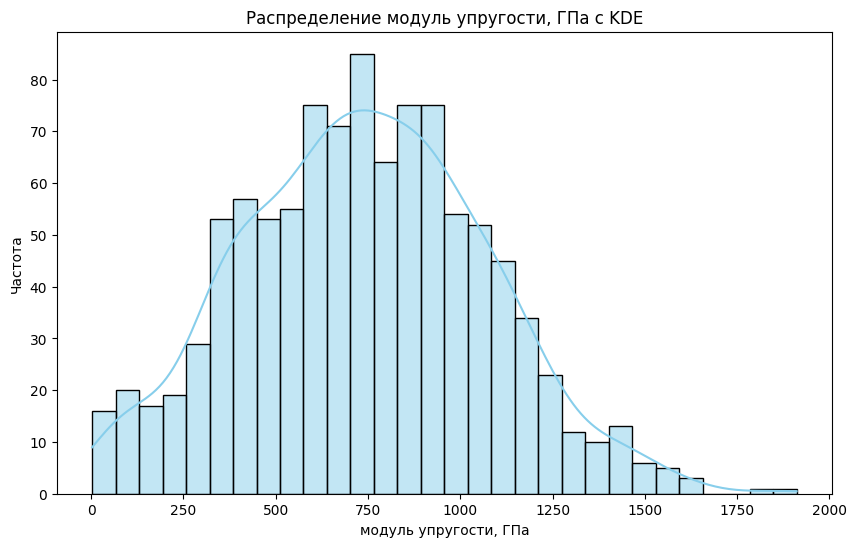

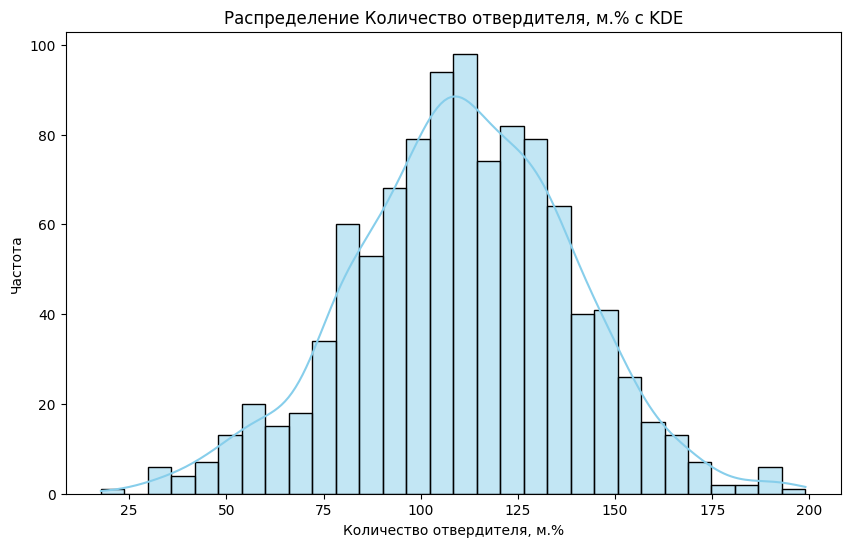

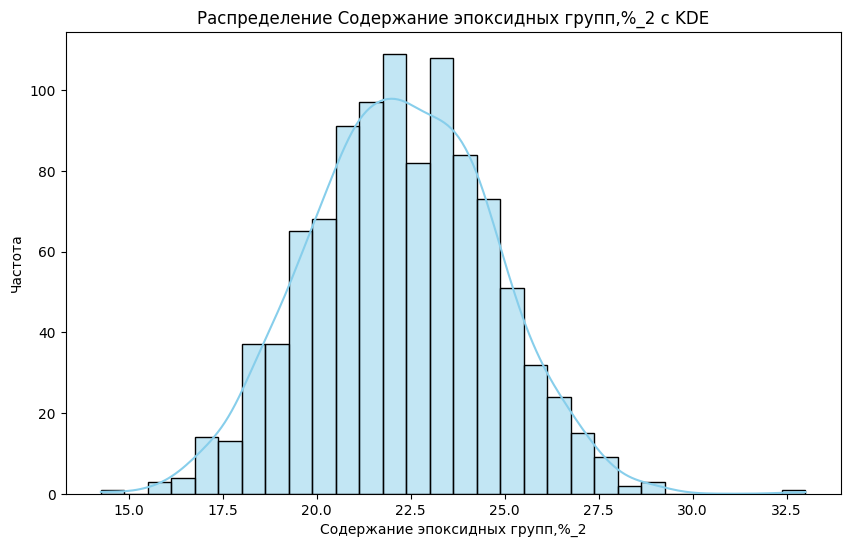

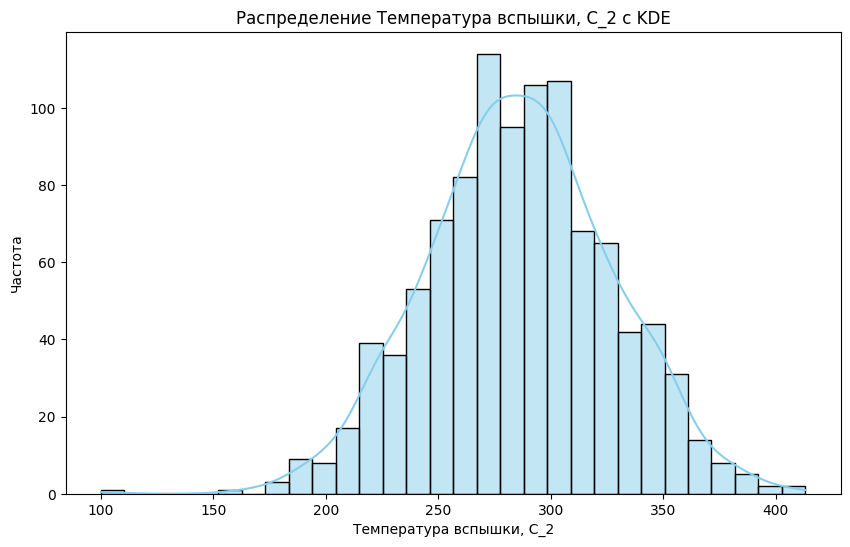

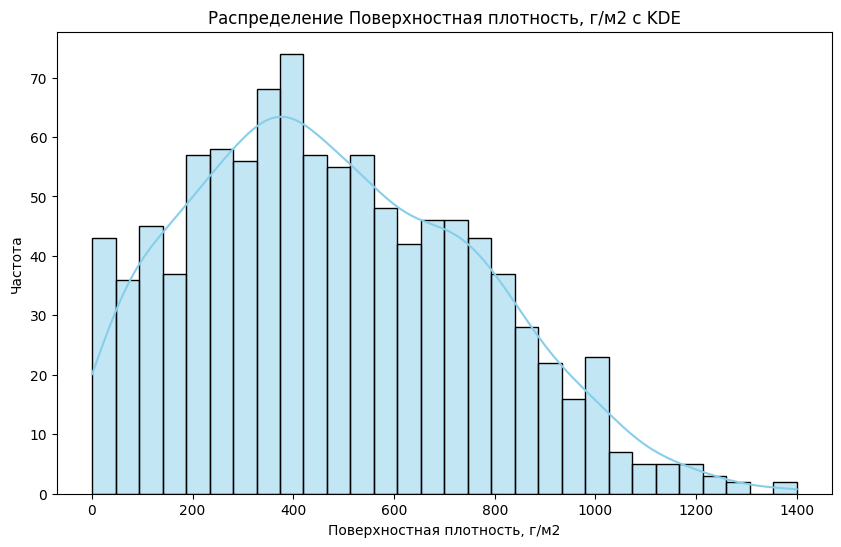

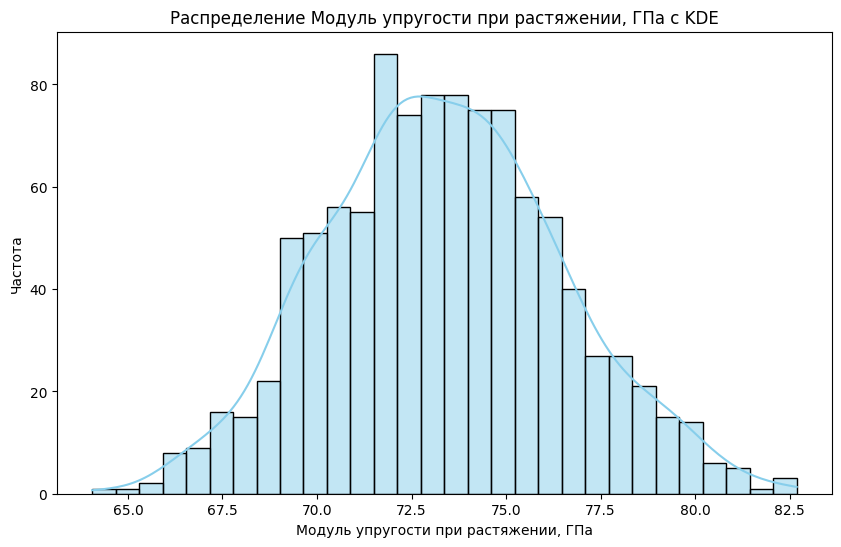

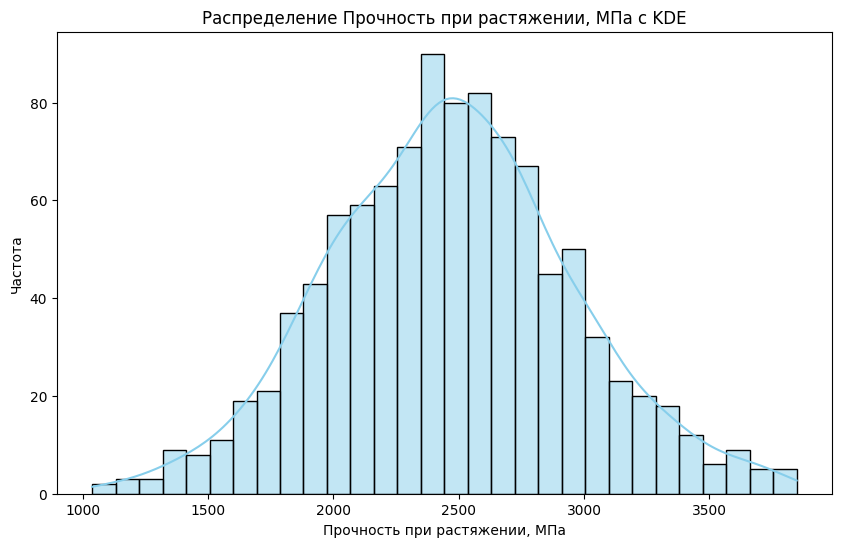

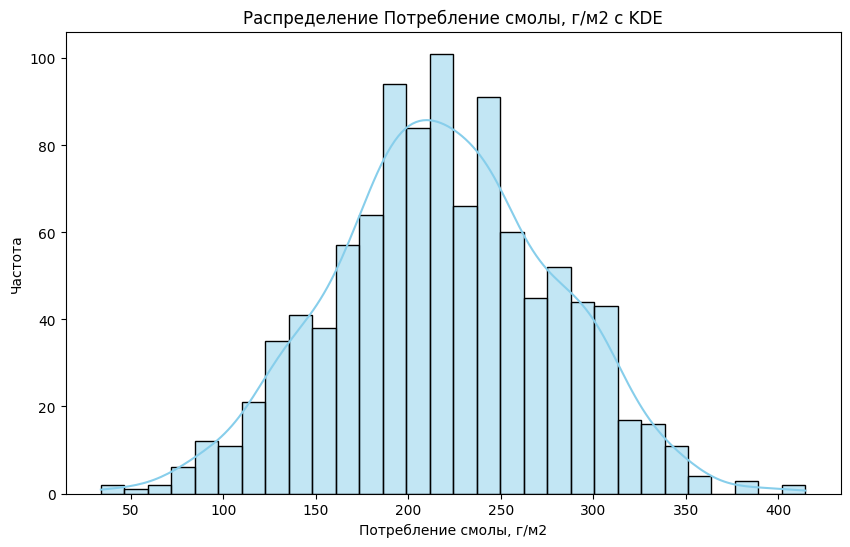

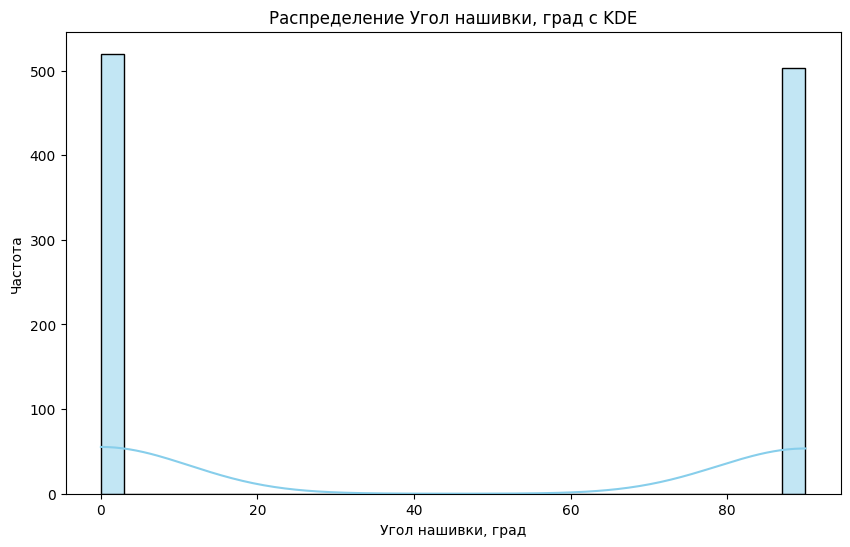

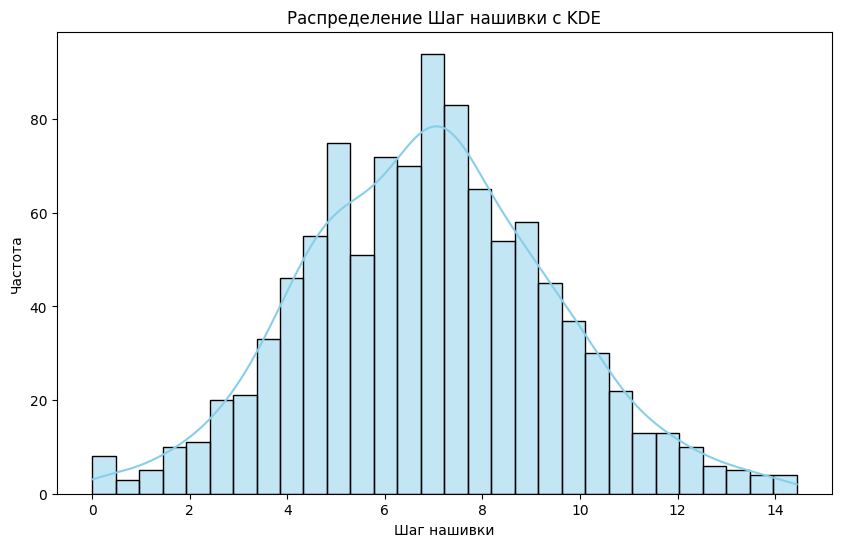

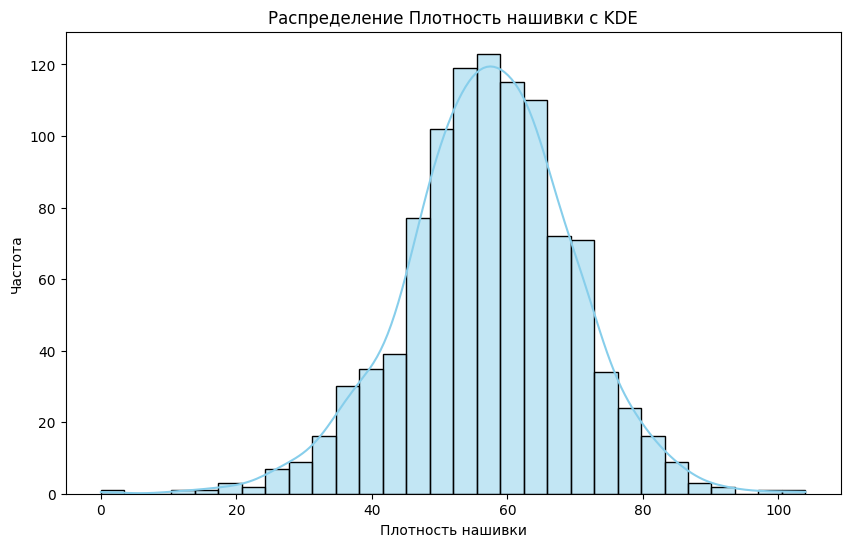

In [89]:
# Визуализация распределений числовых признаков
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Распределение {col} с KDE')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

##### 2.2 Анализ корреляций.

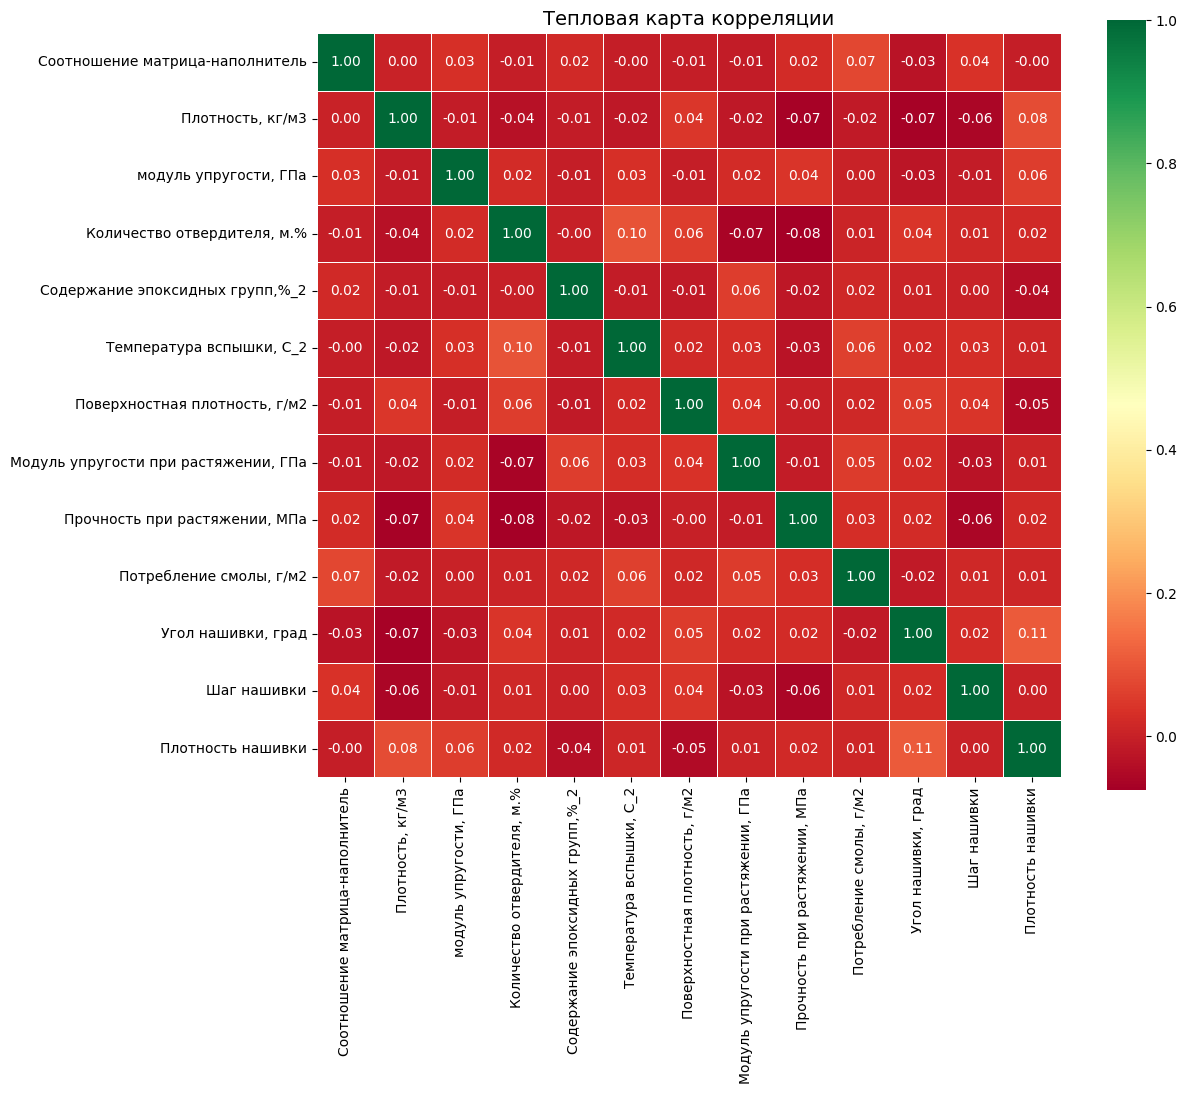

In [90]:
# Расчет корреляции
corr = df.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    linewidths=0.5,
    square=True
)
plt.title("Тепловая карта корреляции", fontsize=14)
plt.show()

In [91]:
df.corr(method ='pearson') # Расчет корреляции Пирсона

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


In [92]:
df.corr(method ='kendall') # Расчет корреляции Кендалла

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,-0.003135,0.021247,0.001410,0.010180,-0.009480,-0.002060,-0.004157,0.011614,0.035145,-0.021395,0.022723,0.002788
"Плотность, кг/м3",-0.003135,1.000000,-0.008059,-0.021963,-0.007758,-0.019947,0.037302,-0.021151,-0.047426,-0.017079,-0.051525,-0.031220,0.052935
"модуль упругости, ГПа",0.021247,-0.008059,1.000000,0.022382,0.002351,0.021028,-0.000442,0.005458,0.022959,0.005169,-0.031695,-0.008305,0.049347
"Количество отвердителя, м.%",0.001410,-0.021963,0.022382,1.000000,0.000010,0.059034,0.033110,-0.043140,-0.046507,-0.003677,0.024690,0.006232,0.016607
"Содержание эпоксидных групп,%_2",0.010180,-0.007758,0.002351,0.000010,1.000000,-0.002170,-0.006859,0.041994,-0.013441,0.009756,0.004668,-0.004539,-0.021968
"Температура вспышки, С_2",-0.009480,-0.019947,0.021028,0.059034,-0.002170,1.000000,0.017196,0.016481,-0.019106,0.035313,0.017880,0.029552,0.005268
"Поверхностная плотность, г/м2",-0.002060,0.037302,-0.000442,0.033110,-0.006859,0.017196,1.000000,0.024051,-0.005099,-0.004446,0.045452,0.025514,-0.022320
"Модуль упругости при растяжении, ГПа",-0.004157,-0.021151,0.005458,-0.043140,0.041994,0.016481,0.024051,1.000000,-0.006599,0.034814,0.022431,-0.010024,-0.002600
"Прочность при растяжении, МПа",0.011614,-0.047426,0.022959,-0.046507,-0.013441,-0.019106,-0.005099,-0.006599,1.000000,0.013580,0.020609,-0.048049,0.009821
"Потребление смолы, г/м2",0.035145,-0.017079,0.005169,-0.003677,0.009756,0.035313,-0.004446,0.034814,0.013580,1.000000,-0.002402,0.005962,0.010792


##### 2.3 Поиск и обработка выбросов.

In [93]:
# Функция для поиска выбросов по методу IQR
def find_outliers_iqr(data):
    outliers = pd.DataFrame()
    for col in data.select_dtypes(include=['number']): 
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = ~data[col].between(lower, upper) 
    return outliers

outliers_iqr = find_outliers_iqr(df)
print("Выбросы по IQR:")
print(outliers_iqr.sum())  

Выбросы по IQR:
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64


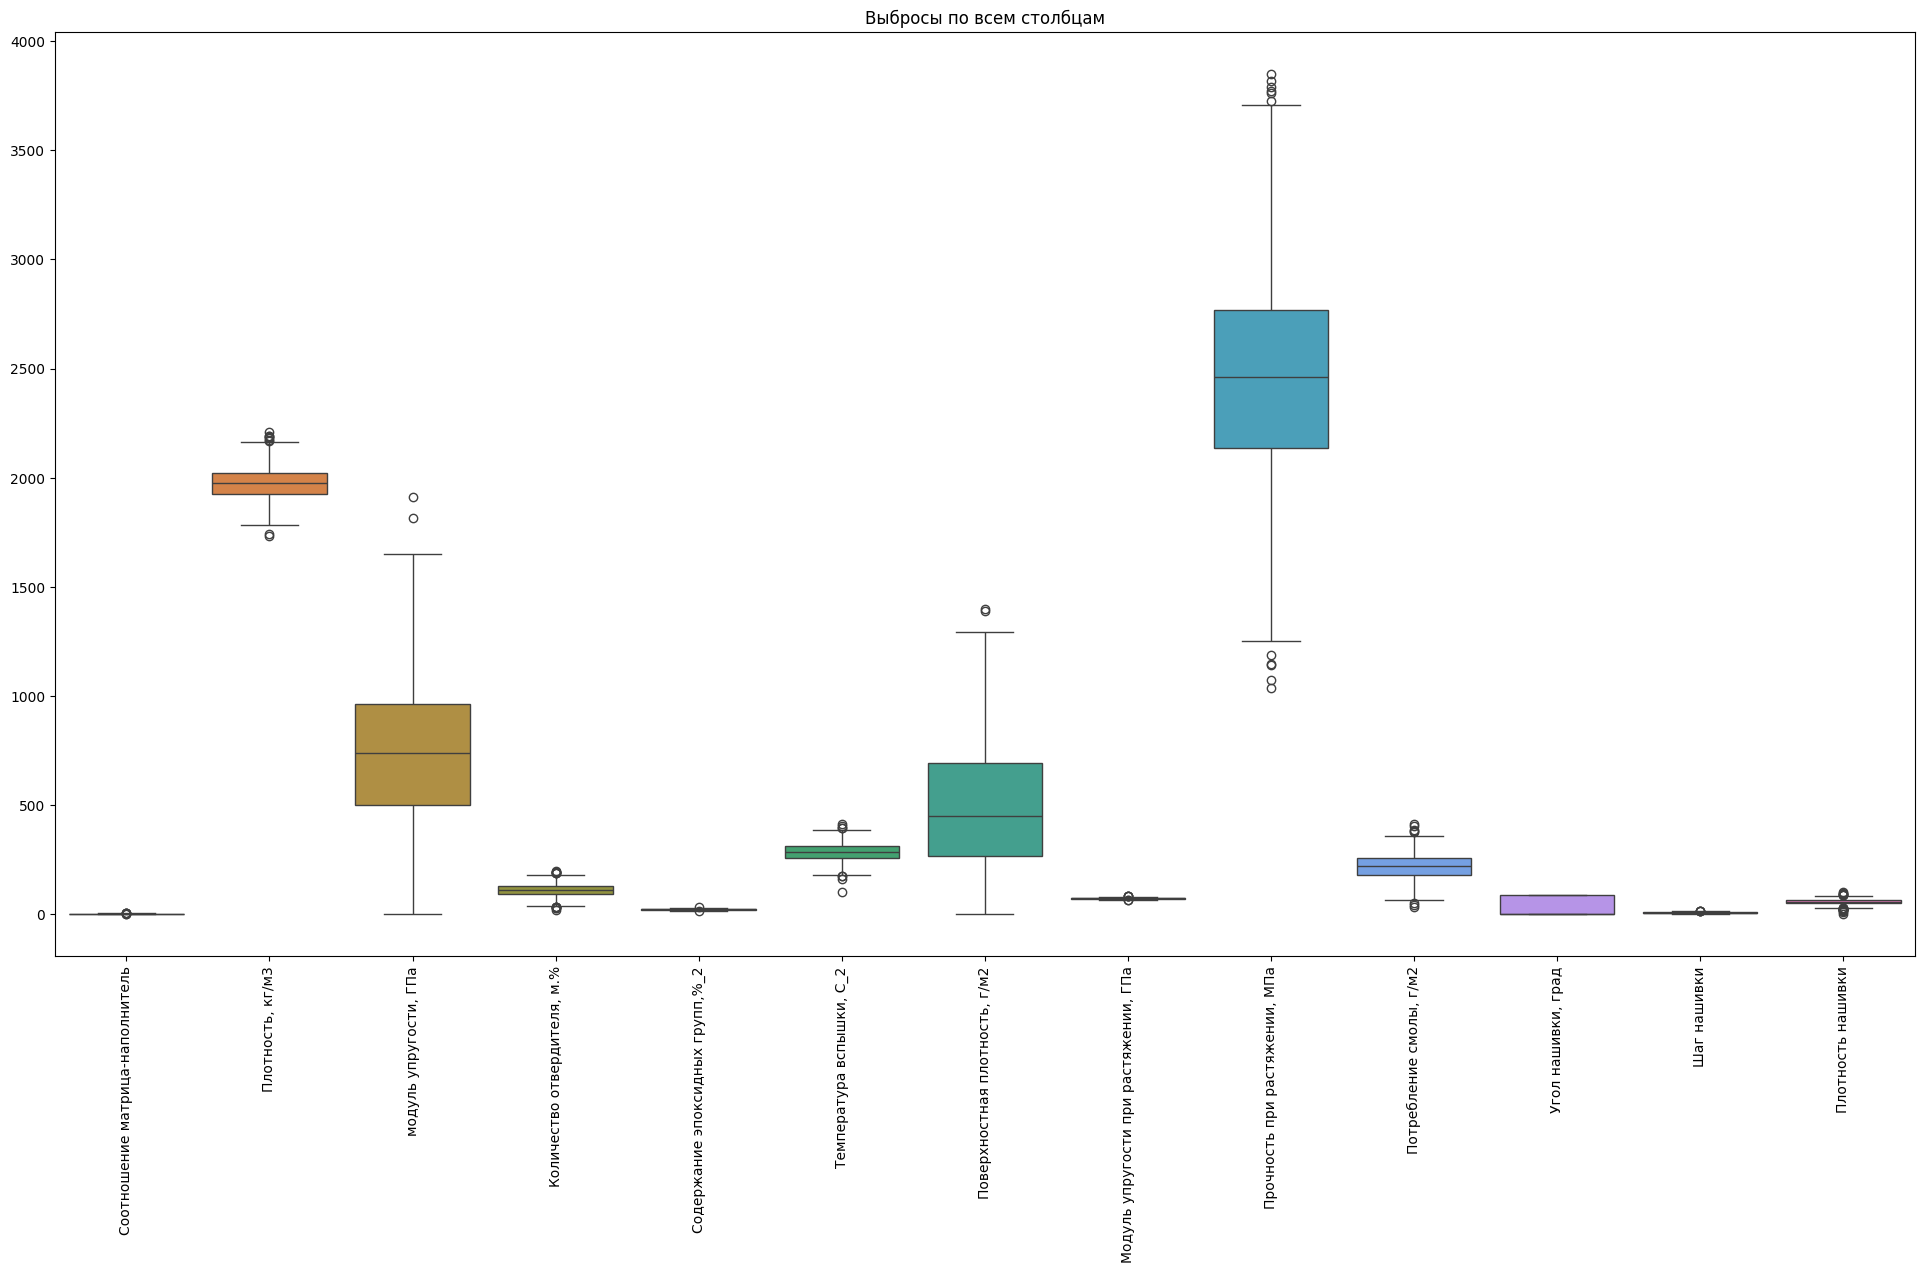

In [94]:
# Визуализация выбросов
plt.figure(figsize=(24, 12))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Выбросы по всем столбцам")
plt.show()

In [95]:
# Функция для замены выбросов на средние значения
def replace_outliers_iqr_with_mean(data):
    data_clean = data.copy()
    for col in data.select_dtypes(include=['number']):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_val = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)][col].mean()
        data_clean[col] = np.where(
            (data[col] < lower_bound) | (data[col] > upper_bound),
            mean_val,
            data[col]
        )
    return data_clean

In [96]:
# Анализ доли пропущенных значений
(df.isnull().mean()).rename('доля выбросов').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,доля выбросов
Соотношение матрица-наполнитель,0.00%
"Плотность, кг/м3",0.00%
"модуль упругости, ГПа",0.00%
"Количество отвердителя, м.%",0.00%
"Содержание эпоксидных групп,%_2",0.00%
"Температура вспышки, С_2",0.00%
"Поверхностная плотность, г/м2",0.00%
"Модуль упругости при растяжении, ГПа",0.00%
"Прочность при растяжении, МПа",0.00%
"Потребление смолы, г/м2",0.00%


### 3. Кластеризация.

##### 3.1 Масштабирование признаков.

In [97]:
# Кластеризация для 'Модуль упругости при растяжении, ГПа'
cluster_features = ['Модуль упругости при растяжении, ГПа']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cluster_features])

##### 3.2 Определение оптимального числа кластеров.

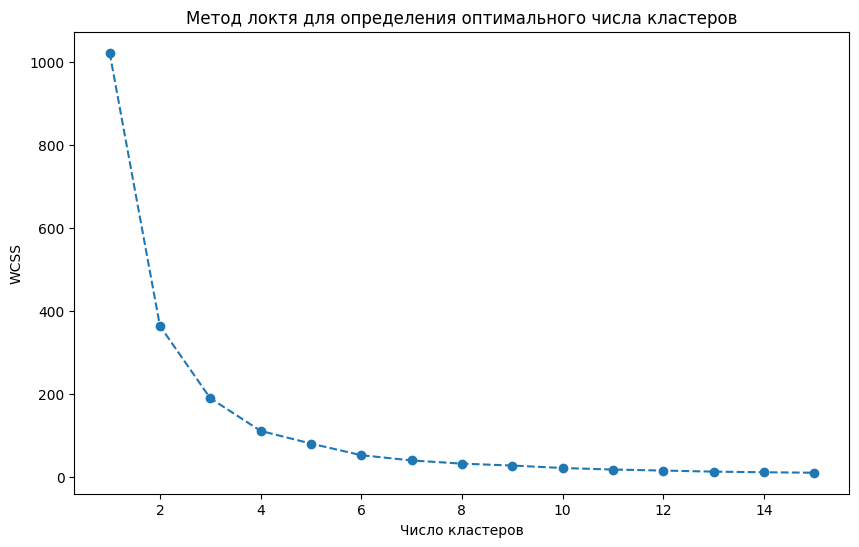

In [98]:
# Метод локтя для определения оптимального числа кластеров
wcss = []  
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

##### 3.3 Применение KMeans.

In [99]:
# Применение KMeans с оптимальным числом кластеров
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

# Оценка качества кластеризации
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Средний коэффициент силуэта: {silhouette_avg:.3f}")

Средний коэффициент силуэта: 0.547


##### 3.4 Анализ кластеров.

In [100]:
# Анализ кластеров
cluster_stats = df.groupby('Cluster')[cluster_features].mean()
print("\nСредние значения по кластерам:")
print(cluster_stats)


Средние значения по кластерам:
         Модуль упругости при растяжении, ГПа
Cluster                                      
0                                   74.128333
1                                   67.258207
2                                   76.178583
3                                   79.129224
4                                   69.880911
5                                   72.106326


In [101]:
# Сохранение кластеров в DataFrame
df['Cluster'] = np.nan
df.loc[df.index, 'Cluster'] = clusters
print(f"Размер df: {len(df)}")
print(f"Уникальные кластеры: {df['Cluster'].unique()}")

Размер df: 1023
Уникальные кластеры: [4. 0. 3. 2. 5. 1.]


In [102]:
# Функция для оценки моделей регрессии
def evaluate_model(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}') 
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')

In [103]:
# Подготовка данных для моделирования модуля упругости
df['Cluster'] = clusters

X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
y = df['Модуль упругости при растяжении, ГПа']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [104]:
# Проверка, что делаем все правильно
print(len(X_train.columns))
X_train.head()

12


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Cluster
ID,,,,,,,,,,,,
604,3.578784,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,160.519027,90.0,10.264664,73.738350,5
227,2.927797,2006.130229,950.619006,154.668800,24.180832,295.136522,710.118283,142.512092,0.0,6.625209,43.354425,4
970,2.279886,1946.473054,1008.415902,151.684921,23.267756,293.317127,282.038385,211.029671,90.0,4.517337,48.264796,5
497,3.016343,2079.295010,1122.119595,105.588808,25.181815,268.548003,292.979124,166.876118,0.0,0.730260,84.015247,4
919,2.030340,1960.657425,914.439785,119.615352,23.325002,227.147788,86.252875,76.023075,90.0,6.624530,66.958941,5


### 4. Построение модели для модуля упругости.

In [ ]:
# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, random_state=42)

In [106]:
# Оценка модели
y_pred = model.predict(X_test)
print("\nОценка модели на тестовых данных:")
evaluate_model(y_test, y_pred)


Оценка модели на тестовых данных:
MAE: 0.6183
R2: 0.9325
MSE: 0.6706
RMSE: 0.8189


In [107]:
# Проверка предсказания для конкретного примера
data_to_check = 111
print(X_train.iloc[data_to_check])
print()
print(y_train.iloc[data_to_check])

model.predict(X_test.iloc[data_to_check:data_to_check+1])


Соотношение матрица-наполнитель       1.042215
Плотность, кг/м3                   1866.605523
модуль упругости, ГПа               693.578011
Количество отвердителя, м.%         153.507157
Содержание эпоксидных групп,%_2      18.309488
Температура вспышки, С_2            351.969637
Поверхностная плотность, г/м2       426.504213
Потребление смолы, г/м2             147.831879
Угол нашивки, град                   90.000000
Шаг нашивки                           8.262472
Плотность нашивки                    47.813665
Cluster                               4.000000
Name: 689, dtype: float64

70.1084162429248


array([73.87325227])

In [108]:
# Добавление предсказаний в тестовые данные
X_test.insert(0, 'pred', y_pred) 
X_test.insert(9, 'Модуль упругости при растяжении, ГПа', y_pred)
X_test.insert(10, 'Прочность при растяжении, МПа', y_pred)
X_test.head()

,pred,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Cluster
ID,,,,,,,,,,,,,,,
525,75.661271,3.790051,1962.764956,673.263749,73.780951,18.800746,351.088180,412.504400,271.263323,75.661271,75.661271,0.0,5.333214,44.180650,2
357,76.587686,2.661267,1948.878616,719.246538,97.874782,21.376260,273.888846,976.777577,162.998234,76.587686,76.587686,0.0,7.358027,49.360765,2
444,73.608681,3.174404,1980.823788,459.047070,81.162535,21.787358,322.371649,233.898871,200.414215,73.608681,73.608681,0.0,3.717884,48.955385,0
31,69.552252,1.771436,1872.491560,801.033883,79.794548,22.296304,340.736898,864.929184,123.356264,69.552252,69.552252,90.0,7.000000,70.000000,4
618,72.026535,3.276517,1911.245306,213.466388,78.847811,21.778934,226.990371,113.590494,223.770443,72.026535,72.026535,90.0,8.776210,58.450719,5


In [109]:
# Сохранение модели
with open('model_1.sav', 'wb') as f:
    pickle.dump(model, f)
    
# Загрузка модели для проверки
with open('model_1.sav', 'rb') as f: 
    model_1 = pickle.load(f)

### 5. Кластеризация для второго признака.

##### 5.1 Масштабирование признаков.

In [110]:
# Кластеризация для 'Прочность при растяжении, МПа'
cluster_features = ['Прочность при растяжении, МПа']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cluster_features])

##### 5.2 Определение оптимального числа кластеров.

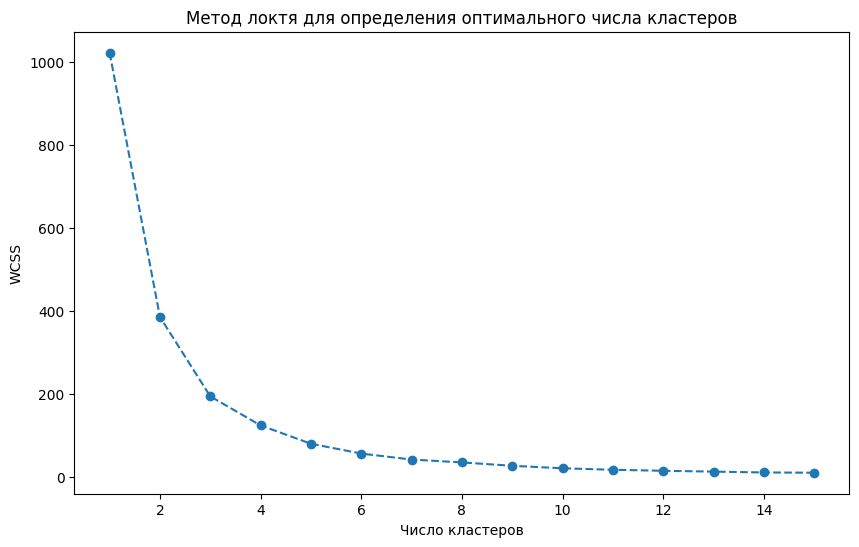

In [111]:
# Метод локтя для определения оптимального числа кластеров
wcss = []  
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

##### 5.3 Применение KMeans.

In [112]:
# Применение KMeans с оптимальным числом кластеров
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

# Оценка качества кластеризации
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Средний коэффициент силуэта: {silhouette_avg:.3f}")

Средний коэффициент силуэта: 0.530


##### 5.4 Анализ кластеров.

In [113]:
# Анализ кластеров
cluster_stats = df.groupby('Cluster')[cluster_features].mean()
print("\nСредние значения по кластерам:")
print(cluster_stats)


Средние значения по кластерам:
         Прочность при растяжении, МПа
Cluster                               
0                          1988.835610
1                          2984.503349
2                          2654.449928
3                          1536.126573
4                          3440.039883
5                          2345.976927


In [114]:
# Сохранение кластеров в DataFrame
df['Cluster'] = np.nan
df.loc[df.index, 'Cluster'] = clusters
print(f"Размер df: {len(df)}")
print(f"Уникальные кластеры: {df['Cluster'].unique()}")

Размер df: 1023
Уникальные кластеры: [1. 0. 5. 2. 4. 3.]


In [115]:
# Функция для оценки моделей регрессии
def evaluate_model(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}') 
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')

In [116]:
# Подготовка данных для прочности при растяжении
df['Cluster'] = clusters

X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
y = df['Прочность при растяжении, МПа']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [117]:
# Проверка, что делаем все правильно
print(len(X_train.columns))
X_train.head()

12


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Cluster
ID,,,,,,,,,,,,
604,3.578784,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,160.519027,90.0,10.264664,73.738350,3
227,2.927797,2006.130229,950.619006,154.668800,24.180832,295.136522,710.118283,142.512092,0.0,6.625209,43.354425,3
970,2.279886,1946.473054,1008.415902,151.684921,23.267756,293.317127,282.038385,211.029671,90.0,4.517337,48.264796,5
497,3.016343,2079.295010,1122.119595,105.588808,25.181815,268.548003,292.979124,166.876118,0.0,0.730260,84.015247,5
919,2.030340,1960.657425,914.439785,119.615352,23.325002,227.147788,86.252875,76.023075,90.0,6.624530,66.958941,0


### 6. Построение модели для прочности при растяжении.

In [ ]:
# Создание и обучение модели адаптивного бустинга
model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [119]:
# Оценка модели
y_pred = model.predict(X_test)
print("\nОценка модели на тестовых данных:")
evaluate_model(y_test, y_pred)
y_pred = model.predict(X_test) 


Оценка модели на тестовых данных:
MAE: 93.3244
R2: 0.9437
MSE: 12601.9358
RMSE: 112.2583


In [120]:
# Проверка предсказания для конкретного примера
data_to_check = 111
print(X_train.iloc[data_to_check])
print()
print(y_train.iloc[data_to_check])

model.predict(X_test.iloc[data_to_check:data_to_check+1])

Соотношение матрица-наполнитель       1.042215
Плотность, кг/м3                   1866.605523
модуль упругости, ГПа               693.578011
Количество отвердителя, м.%         153.507157
Содержание эпоксидных групп,%_2      18.309488
Температура вспышки, С_2            351.969637
Поверхностная плотность, г/м2       426.504213
Потребление смолы, г/м2             147.831879
Угол нашивки, град                   90.000000
Шаг нашивки                           8.262472
Плотность нашивки                    47.813665
Cluster                               5.000000
Name: 689, dtype: float64

2461.45510738333


array([2345.16491276])

In [121]:
# Добавление предсказаний в тестовые данные
X_test.insert(0, 'pred', y_pred) 
X_test.insert(9, 'Модуль упругости при растяжении, ГПа', y_pred)
X_test.insert(10, 'Прочность при растяжении, МПа', y_pred)
X_test.head()

,pred,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Cluster
ID,,,,,,,,,,,,,,,
525,2652.530877,3.790051,1962.764956,673.263749,73.780951,18.800746,351.088180,412.504400,271.263323,2652.530877,2652.530877,0.0,5.333214,44.180650,2
357,2337.786909,2.661267,1948.878616,719.246538,97.874782,21.376260,273.888846,976.777577,162.998234,2337.786909,2337.786909,0.0,7.358027,49.360765,5
444,2341.320842,3.174404,1980.823788,459.047070,81.162535,21.787358,322.371649,233.898871,200.414215,2341.320842,2341.320842,0.0,3.717884,48.955385,5
31,2653.862850,1.771436,1872.491560,801.033883,79.794548,22.296304,340.736898,864.929184,123.356264,2653.862850,2653.862850,90.0,7.000000,70.000000,2
618,2653.520714,3.276517,1911.245306,213.466388,78.847811,21.778934,226.990371,113.590494,223.770443,2653.520714,2653.520714,90.0,8.776210,58.450719,2


In [122]:
# Сохранение модели
with open('model_2.sav', 'wb') as f:
    pickle.dump(model, f)
    
# Загрузка модели
with open('model_2.sav', 'rb') as f: 
    model_2 = pickle.load(f)

### 7. Нейронная сеть.

##### 7.1 Загрузка и подготовка данных.

In [ ]:
# Функция загрузки и подготовки данных
def load_and_prepare_data():
    input_features = [
        "Плотность, кг/м3", "модуль упругости, ГПа", 
        "Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2",
        "Температура вспышки, С_2", "Поверхностная плотность, г/м2",
        "Прочность при растяжении, МПа", "Модуль упругости при растяжении, ГПа",
        "Потребление смолы, г/м2", "Угол нашивки, град", 
        "Шаг нашивки", "Плотность нашивки"
    ]
    target = 'Соотношение матрица-наполнитель'

    X = df[input_features]
    y = df[[target]]
    
    return X, y

##### 7.2 Построение архитектуры сети.

In [ ]:
# Функция построения архитектуры нейронной сети
def build_model():
    model = keras.Sequential()
    
    # Фиксированная архитектура: 2 слоя по 8 нейронов
    model.add(layers.Dense(8, activation='relu', input_shape=(12,)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(1))
    
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', keras.metrics.MeanAbsolutePercentageError(name='mape')]
    )
    return model

##### 7.3 Кросс-валидация.

In [ ]:
# Функция кросс-валидации
def train_with_cv(X, y, n_splits=5, epochs=100):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    histories = []
    
    # Цикл по фолдам
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Масштабирование
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Создание и обучение модели
        model = build_model()
        
        early_stopping = callbacks.EarlyStopping(
            patience=10,
            restore_best_weights=True
        )
        
        # Обучение модели
        history = model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=epochs,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=0
        )
        
        # Оценка модели на валидационных данных
        val_loss, val_mae, val_mape = model.evaluate(X_val_scaled, y_val, verbose=0)
        cv_scores.append(val_mae)
        histories.append(history)
    
    return cv_scores, histories

##### 7.4 Основная функция.

In [ ]:
def main():
    # Загрузка данных
    X, y = load_and_prepare_data()
    
    # Кросс-валидация
    cv_scores, histories = train_with_cv(X, y)
    print(f"Average CV MAE: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    
    # Окончательное обучение на всех данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Создание и обучение модели с фиксированной архитектурой
    model = build_model()
    
    # Обучение модели с историей
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=1
    )
    
    # Визуализация функции потерь для финального обучения
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Потери обучения')
    plt.plot(history.history['val_loss'], label='Потери валидации')
    plt.title('Функции потерь финальной модели')
    plt.ylabel('Потери (MSE)')
    plt.xlabel('Эпохи')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Оценка на тестовых данных
    test_loss, test_mae, test_mape = model.evaluate(X_test_scaled, y_test)
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Test MAPE: {test_mape:.2f}%")
    
    # Прогнозирование
    y_pred = model.predict(X_test_scaled)
    
    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказания')
    plt.title('Истинные vs предсказанные значения')
    plt.show()
    
    # Сохранение модели
    model.save('dnn_model.keras')
    
    # Важность признаков (пример)
    feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, feature_importance)
    plt.title('Важность признаков')
    plt.show()

if __name__ == "__main__":
    main()

##### 7.5 Расчет метрик.

In [ ]:
# Функции для расчета и вывода метрик регрессии
def calculate_regression_metrics(y_true, y_pred):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred),
        'MAPE (%)': mean_absolute_percentage_error(y_true, y_pred) * 100
    }
    return metrics

def print_metrics_table(metrics):
    """"""
    print("\nРегрессионные метрики:")
    print("{:<20} {:<10}".format('Метрика', 'Значение'))
    print("-" * 30)
    for name, value in metrics.items():
        print("{:<20} {:<10.4f}".format(name, value))

if __name__ == "__main__":
    y_true = df['Соотношение матрица-наполнитель'].values
    y_pred = df['Соотношение матрица-наполнитель'].values * 0.95
    
    # Вычисление метрик
    metrics = calculate_regression_metrics(y_true, y_pred)
    
    # Вывод результатов
    print_metrics_table(metrics)

# %%
model = keras.models.load_model('dnn_model.keras')
model.summary()